In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -d -v -p mlxtend

Sebastian Raschka 06/27/2015 

CPython 3.4.3
IPython 3.1.0

mlxtend 0.2.8


# mlxtend - Multilayer Perceptron Examples

### Sections

- [Classify Iris](#Classify-Iris)
- [Classify handwritten digits from MNIST](#Classify-handwritten-digits-from-MNIST)

<br>
<br>

# Classify Iris

Load 2 features from Iris (petal length and petal width) for visualization purposes.

In [2]:
from mlxtend.data import iris_data
X, y = iris_data()
X = X[:, 2:]

Train neural network for 3 output flower classes ('Setosa', 'Versicolor', 'Virginica'), regular gradient decent (`minibatches=1`), 30 hidden units, and no regularization.

In [3]:
from mlxtend.classifier import NeuralNetMLP
import numpy as np

nn1 = NeuralNetMLP(n_output=3, 
         n_features=X.shape[1], 
         n_hidden=30, 
         l2=0.0, 
         l1=0.0, 
         epochs=5000, 
         eta=0.001, 
         alpha=0.00,
         minibatches=1, 
         shuffle=True,
         random_state=0)

nn1.fit(X, y)
y_pred = nn1.predict(X)
acc = np.sum(y == y_pred, axis=0) / X.shape[0]
print('Accuracy: %.2f%%' % (acc * 100))

Accuracy: 96.00%


Now, check if the gradient descent converged after 5000 epochs, and choose smaller learning rate (`eta`) otherwise.

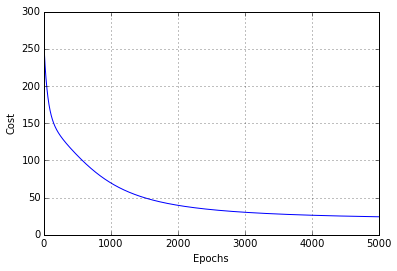

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(nn1.cost_)), nn1.cost_)
plt.ylim([0, 300])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.grid()
plt.show()

Standardize features for smoother and faster convergence.

In [5]:
X_std = np.copy(X)
for i in range(2):
    X_std[:,i] = (X[:,i] - X[:,i].mean()) / X[:,i].std()

nn2 = NeuralNetMLP(n_output=3, 
         n_features=X_std.shape[1], 
         n_hidden=30, 
         l2=0.0, 
         l1=0.0, 
         epochs=1000, 
         eta=0.05,
         alpha=0.1,
         minibatches=1, 
         shuffle=True,
         random_state=1)

nn2.fit(X_std, y)
y_pred = nn2.predict(X_std)
acc = np.sum(y == y_pred, axis=0) / X_std.shape[0]
print('Accuracy: %.2f%%' % (acc * 100))

Accuracy: 96.00%


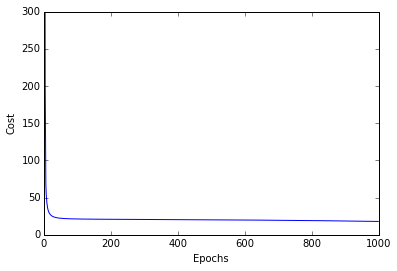

In [6]:
plt.plot(range(len(nn2.cost_)), nn2.cost_)
plt.ylim([0, 300])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

Visualize the decision regions.

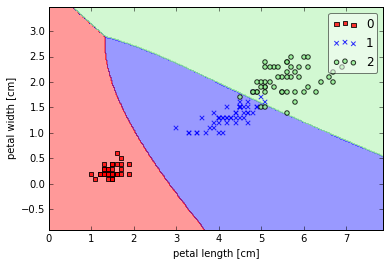

In [7]:
from mlxtend.evaluate import plot_decision_regions

plot_decision_regions(X, y, clf=nn1)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.show()

<br>
<br>

# Classify handwritten digits from MNIST

Load a 5000-sample subset of the [MNIST dataset](http://rasbt.github.io/mlxtend/docs/data/mnist/).

In [8]:
from mlxtend.data import mnist_data
X, y = mnist_data()

Visualize a sample from the MNIST dataset.

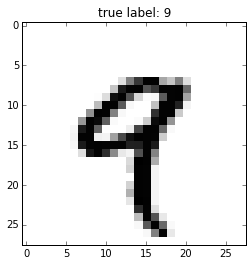

In [9]:
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()

plot_digit(X, y, 4)    

Initialize the neural network to recognize the 10 different digits (0-10) using 300 epochs and minibatch learning.

In [14]:
nn = NeuralNetMLP(n_output=10, n_features=X.shape[1], 
         n_hidden=100, 
         l2=0.0, 
         l1=0.0, 
         epochs=300, 
         eta=0.0005,
         alpha=0.0,
         minibatches=50, 
         random_state=1)

Learn the features while printing the progress to get an idea about how long it may take.

In [15]:
nn.fit(X, y, print_progress=True)
y_pred = nn.predict(X)
acc = np.sum(y == y_pred, axis=0) / X.shape[0]
print('Accuracy: %.2f%%' % (acc * 100))

Epoch: 300/300

Accuracy: 95.48%


Check for convergence.

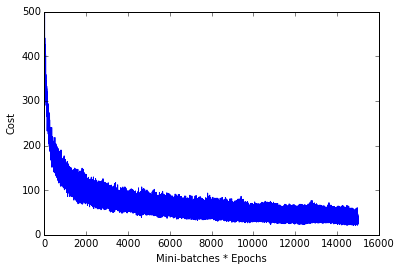

In [16]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 500])
plt.ylabel('Cost')
plt.xlabel('Mini-batches * Epochs')
plt.show()

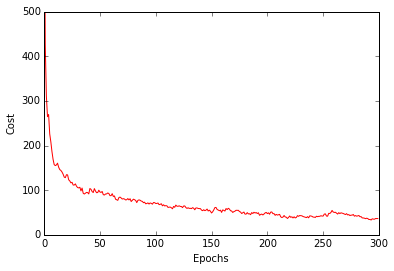

In [17]:
plt.plot(range(len(nn.cost_)//50), nn.cost_[::50], color='red')
plt.ylim([0, 500])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()